<a href="https://colab.research.google.com/gist/Conal97/567f97a647a091edd54784acc6e0e9ef/deterministic-sezr-and-sezrq-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import Packages

import numpy as np
from scipy.integrate import odeint 
from matplotlib import pyplot as plt

In [0]:
# First new Model - SEZR

''' Introduces an 'exposed' state where a suscpetible has been bitten, but has not yet converted into a zombie ''' 

def SEZR(x,tau):

  #Defining parameters 

  beta = 0.008 # the bite parameter (how likely a zombie is to bite and convert a human)
  kappa = 0.0048 # the kill parameter (probability that a human will kill a zombie)
  nu = 0.7 # the rate at which exposed convert to zombies


  S = x[0] # susceptibles
  E = x[1] # exposed
  Z = x[2] # zombies
  N = 200 #population

  #ODE's

  dSdTau = - beta * S * Z
  dEdTau = beta * S * Z - nu * E
  dZdTau = (nu * E) - (kappa * S *Z)
  dRdTau = kappa * S * Z

  return [dSdTau, dEdTau , dZdTau, dRdTau]

In [0]:
# Define initial conditions and run the simulation

x0 = [199, 0, 1 , 0]
tau = np.linspace(0, 30, 1000)
x = odeint(SEZR, x0, tau)

S = x[:, 0]
E = x[:, 1]
Z = x[:, 2]
R = x[:, 3]

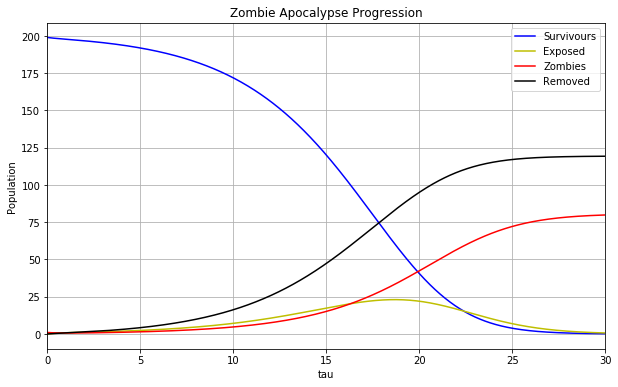

In [0]:
# Plotting results of SEZR

plt.figure(figsize = [10, 6])

plt.plot(tau, S, "b", label = "Survivours")
plt.plot(tau, E, "y", label = "Exposed")
plt.plot(tau, Z, "r", label = "Zombies")
plt.plot(tau, R, "k", label = "Removed")
plt.title("Zombie Apocalypse Progression")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.xlim(0,30)
plt.show()

In [0]:
# SEZRQ

''' Builds upon previous model by adding a quarantined state. 
    These are hospitalised exposed or zombies that can become susceptibles again. ''' 

def SEZRQ(x,tau):

  #Defining parameters 

  beta = 0.008 # the bite parameter (how likely a zombie is to bite and convert a human)
  kappa = 0.0048 # the kill parameter (probability that a human will kill a zombie)
  nu = 0.7 # the rate at which exposed convert to zombies
  sigma = 0.1 # rate at which zombies transition to the Q state
  zeta = 0.05 # rate at which exposed transition to the Q state
  omega = 0.45 #rate at which quarantined transtion back to the susceptible state


  S = x[0] # susceptibles
  E = x[1] # exposed
  Z = x[2] # zombies
  Q = x[4] # quarantined
  N = 200 #population

  #ODE's

  dSdTau = - beta * S * Z + (omega * Q)
  dEdTau = beta * S * Z - nu * E - zeta * E
  dZdTau = (nu * E) - (kappa * S *Z) - sigma * Z
  dRdTau = kappa * S * Z
  dQdTau = zeta * E + sigma * Z - omega * Q

  return [dSdTau, dEdTau , dZdTau, dRdTau, dQdTau]

In [0]:
# Define initial conditions and run the simulation

x0 = [199, 0, 1 , 0, 0]
tau = np.linspace(0, 100, 1000)
x = odeint(SEZRQ, x0, tau)

S = x[:, 0]
E = x[:, 1]
Z = x[:, 2]
R = x[:, 3]
Q = x[:, 4]

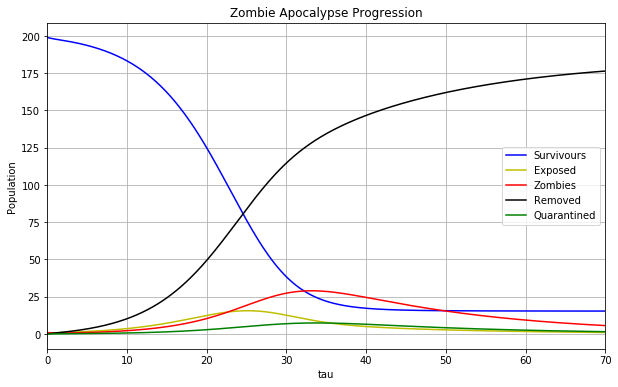

In [0]:
# Plotting results of SEZRQ

plt.figure(figsize = [10, 6])

plt.plot(tau, S, "b", label = "Survivours")
plt.plot(tau, E, "y", label = "Exposed")
plt.plot(tau, Z, "r", label = "Zombies")
plt.plot(tau, R, "k", label = "Removed")
plt.plot(tau, Q, "g", label = "Quarantined")
plt.title("Zombie Apocalypse Progression")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.xlim(0,70)
plt.show()